Для работы используйте набор данных “Global YouTube Statistics.csv”, приложенный к материалам занятия.

Описание датасета:

- rank: Позиция канала YouTube, основанная на количестве подписчиков
- Youtuber: Название канала
- subscribers: Количество подписчиков
- video views: Общее количество просмотров всех видео на канале
- category: Категория или ниша канала
- Title: Заголовок канала
- uploads: Количество загруженных видео на канале
- Country: Страна происхождения канала
- Abbreviation: Абревиатура страны
- channel_type: Тип канала (индивидуальный, корпоративный и т.п.)
- video_views_rank: Рейтинг канала на основе общего количества просмотров видео
- country_rank: Рейтинг канала на основе количества подписчиков в его стране
- channel_type_rank: Ранжирование канала в зависимости от его типа (индивидуальный или брендовый)
- video_views_for_the_last_30_days: Общее количество просмотров видео за последние 30 дней
- lowest_monthly_earnings: Самый низкий предполагаемый ежемесячный доход от канала
- highest_monthly_earnings: Самый высокий предполагаемый ежемесячный доход от канала
- lowest_yearly_earnings: Самый низкий предполагаемый годовой доход от канала
- highest_yearly_earnings: Самый высокий предполагаемый годовой доход от канала
- subscribers_for_last_30_days: Количество новых подписчиков, набранных за последние 30 дней
- created_year:  Год, когда был создан канал YouTube
- created_month:  Месяц, когда был создан канал YouTube
- created_date:  Точная дата создания канала YouTube
- Gross tertiary education enrollment (%): Процент населения, получающего высшее образование в стране
- Population: Общая численность населения страны
- Unemployment rate: уровень безработицы в стране
- Urban_population: Процент населения, проживающего в городских районах
- Latitude: Широтная координата местоположения страны
- Longitude: Долготная координата местоположения страны

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Задание 1. EDA
Проведите разведывательный анализ данных (EDA).

Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.
Изобразите матрицу корреляций для нахождения взаимосвязей.

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='cp1252') #utf8 выдал ошибку
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


<Axes: xlabel='Country'>

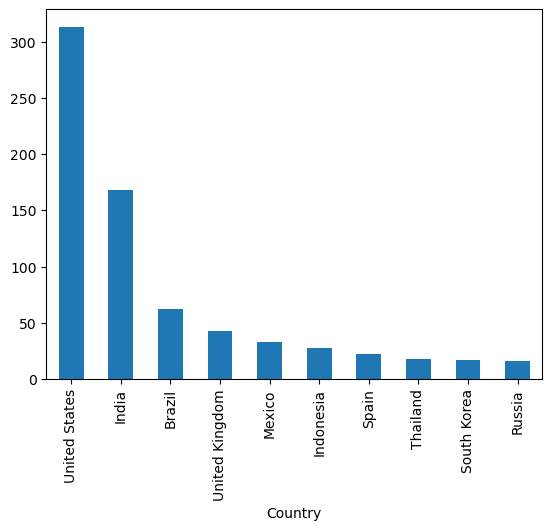

In [5]:
# Топ 10 по стран по количеству каналов
df.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

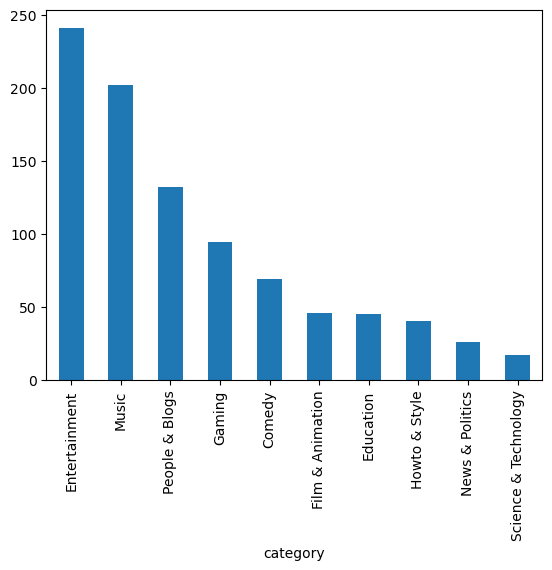

In [6]:
# Топ 10 по категорий по количеству каналов
df.groupby('category')['Youtuber'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

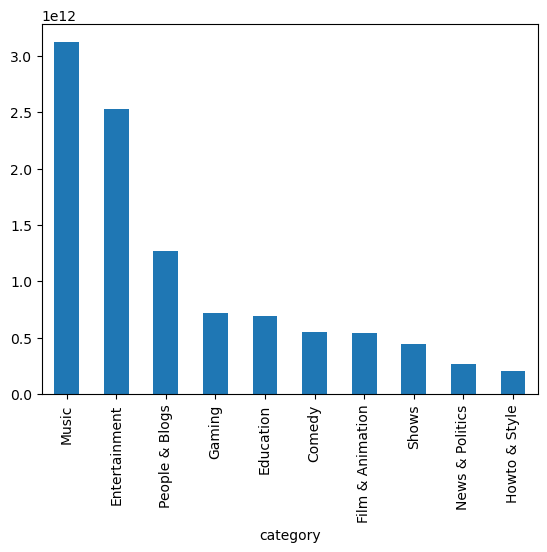

In [7]:
# Что любят смотреть больше всего
df.groupby('category')['video views'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

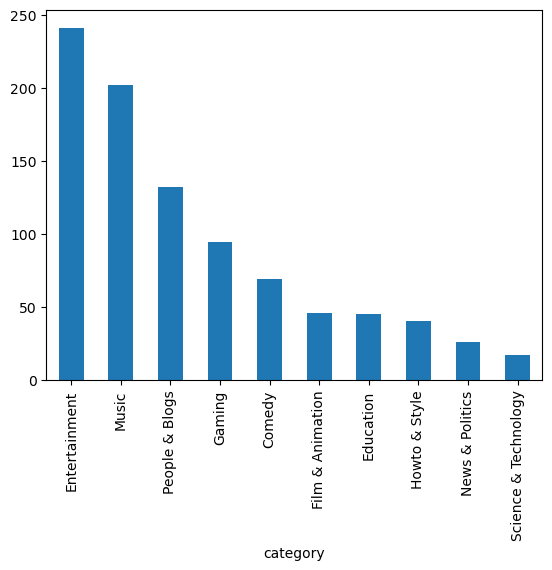

In [8]:
# На какие категории больше всего подписываются
df.groupby('category')['subscribers'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='created_year'>

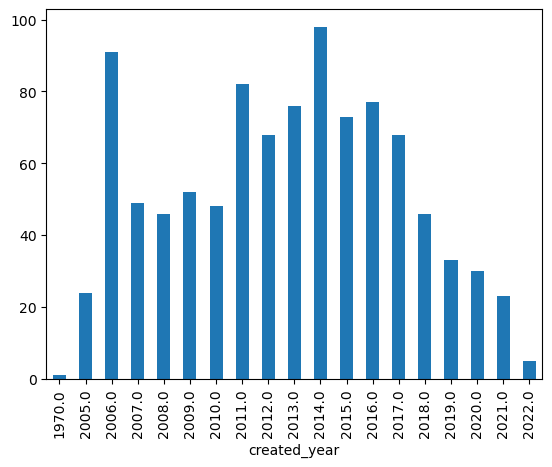

In [9]:
# Как создавались каналы по годам
df.groupby('created_year')['Youtuber'].count().sort_index().plot(kind='bar')

<Axes: xlabel='created_year'>

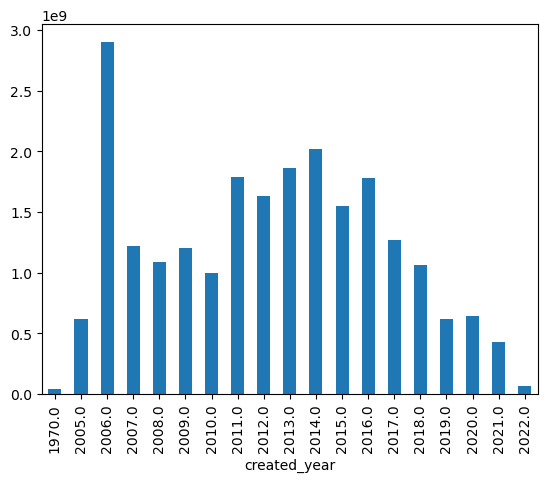

In [10]:
# Как зависит количество подписчиков от года канала
df.groupby('created_year')['subscribers'].sum().sort_index().plot(kind='bar')

<Axes: xlabel='highest_monthly_earnings', ylabel='category'>

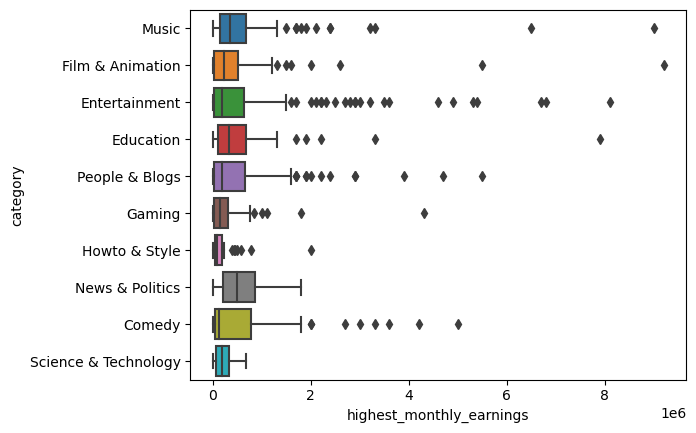

In [11]:
# Доходы за год топовых категорий
top_categoy = df.groupby('category')['Youtuber'].count().sort_values(ascending=False).head(10).index.values
sns.boxplot(
    df[df['category'].isin(top_categoy)][['category', 'highest_monthly_earnings']],
    x = 'highest_monthly_earnings',
    y = 'category'
)


<Axes: >

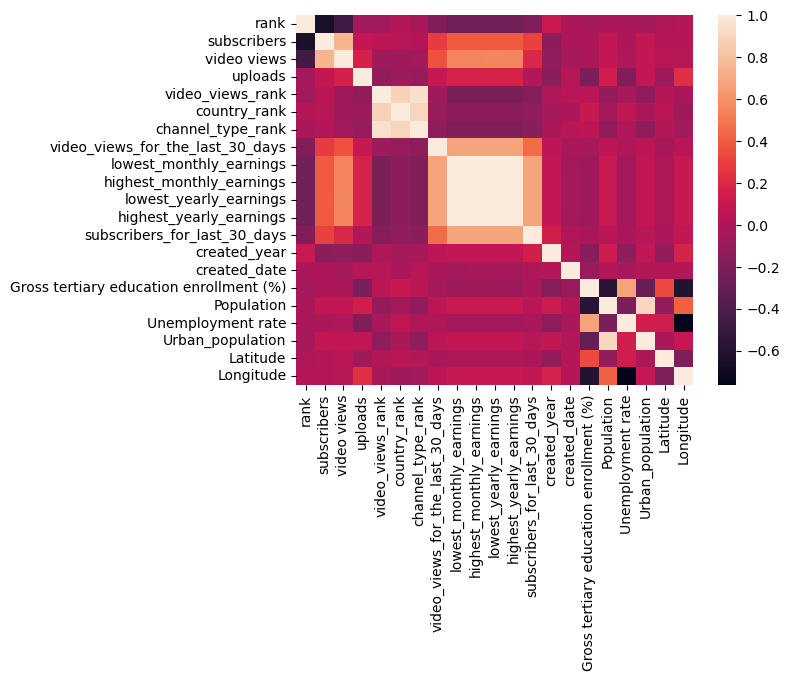

In [12]:
# корреляция всех со всеми
sns.heatmap(df.select_dtypes(exclude='object').corr())

# Задание 2. Корреляционный анализ

- Оставьте два коррелирующих столбца: "subscribers" и"video views".
- Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
- Рассчитайте коэффициент корреляции Пирсона.
- Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
- Разделите выборку на тестовую и тренировочную.
- Постройте модель линейной регрессии.
- Рассчитайте точность модели на тестовой выборке.
- Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [13]:
df2 = df[df['video views'] != 0][['subscribers', 'video views']]
df2.corr()

,subscribers,video views
subscribers,1.000000,0.824262
video views,0.824262,1.000000


In [17]:
X = df2[['video views']]
y = df2['subscribers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [19]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.8366523672915507

Коэффициент детерминации 0,837
Хороший результат

In [22]:
X2 = df[['video views']]
y2 = df['subscribers']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.30, random_state=13)
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
lr2.score(X2_test, y2_test)


0.8366523672915507

Фильтрация никак не повлияла на точность. Возможно потому, что отфильтровано было мало записей

# Задание 3. Классификация

- Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
- В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
- Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
- Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
- Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
- Постройте модель логистической регрессии.
- Рассчитайте точность модели на тестовой выборке.
- Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [34]:
df_c = df[df['category'].isin(
    df.groupby('category')['subscribers'].count().sort_values(ascending=False).head(2).index.values
)]
df_c_nz = df_c[df_c['video views'] != 0]
df_c_nz

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
17,18,BANGTANTV,75600000,2.082699e+10,Music,BANGTANTV,2281,South Korea,KR,Music,...,400000.0,2012.0,Dec,17.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,977,SAAIHALILINTAR,12400000,1.113066e+09,Entertainment,SAAIHALILINTAR,409,Indonesia,ID,Entertainment,...,NaN,2012.0,Apr,28.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
978,979,Heidi and Zidane HZHtube,12400000,4.021409e+09,Entertainment,Heidi and Zidane HZHtube,813,Canada,CA,Entertainment,...,NaN,2015.0,Nov,24.0,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771
982,983,DisneyChannelUK,12400000,1.260749e+10,Music,DisneyChannelUK,4422,United Kingdom,GB,Entertainment,...,NaN,2007.0,Dec,6.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [36]:
le = LabelEncoder()
X = df_c_nz[['subscribers', 'video views', 'uploads']]
y = le.fit_transform(df_c_nz['category'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)


In [49]:
lr3 = LogisticRegression()
lr3.fit(X_train, y_train)
lr3.score(X_test, y_test)


0.6015037593984962

Точность довольно низкая. Видимо потому, что выбраны кореллированые признаки.

Уберем subscribers, добавим highest_yearly_earnings   

In [53]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_rank  398 non-null    float64
 1   video views   443 non-null    float64
 2   uploads       443 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 13.8 KB


In [60]:
X2 = df_c_nz[['highest_yearly_earnings', 'video views', 'uploads']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=13)
lr4 = LogisticRegression()
lr4.fit(X2_train, y2_train)
lr4.score(X2_test, y_test)

0.556390977443609

Не удалось повысить точность.